                                        # YELP Data -  An Exploratory Analysis #

In [2]:
import argparse
import collections
import csv
import json
from itertools import islice
import numpy as np
%pylab notebook
from statistics import mean, median
import seaborn as sns
import pylab as pl
from scipy import stats
import pandas as pd
from IPython.display import HTML, display
from sklearn.preprocessing import label_binarize, LabelEncoder

Populating the interactive namespace from numpy and matplotlib


# 1. Getting and Cleaning Data 

# Bussiness File

In [3]:
# File to Load (Remember to Change These)
file_to_load_json = "business.json"

# Read Purchasing File and store into Pandas data frame
business = pd.read_json(file_to_load_json, orient="records", lines = True)

In [4]:
#business.head() 

In [5]:
#To drop the rows where category is != than "Restaurants" 
restaurants = business[business['categories'].apply(lambda x: 'Restaurants' in x)]

In [6]:
#len(restaurants)

In [7]:
listcolumns = list(restaurants.columns.values)
#listcolumns

In [8]:
cities = restaurants.city.unique()
#len(cities)

In [9]:
#Open Restaurants 
openList = restaurants.is_open.value_counts()
openList = pd.DataFrame(openList)
openList['Open(%)'] = openList['is_open'] / len(restaurants) * 100
#openList

<IPython.core.display.Javascript object>


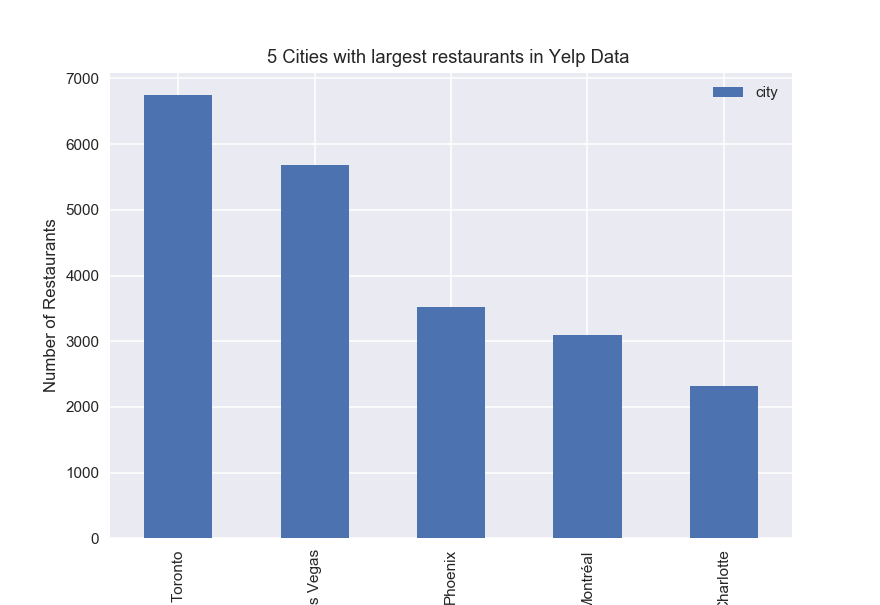

In [10]:
#how many records does have each city 
citiesTwo = restaurants.city.value_counts()
cities_graph = citiesTwo.sort_values(ascending = False).head(5).plot(kind="bar")
plt.title('5 Cities with largest restaurants in Yelp Data ')
plt.ylabel('Number of Restaurants')
plt.legend(loc='upper right')
plt.savefig('5Cities_vs_#Restaurants.png')

# 2. Restaurants 

<IPython.core.display.Javascript object>


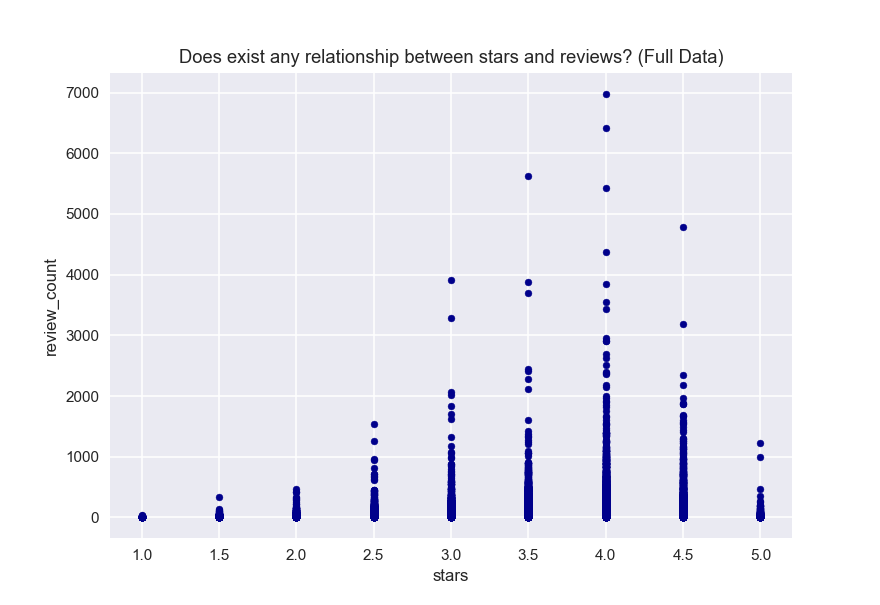

In [11]:
restaurants.plot(kind="scatter", x='stars', y='review_count', color='DarkBlue')
plt.title ("Does exist any relationship between stars and reviews? (Full Data)")

<IPython.core.display.Javascript object>


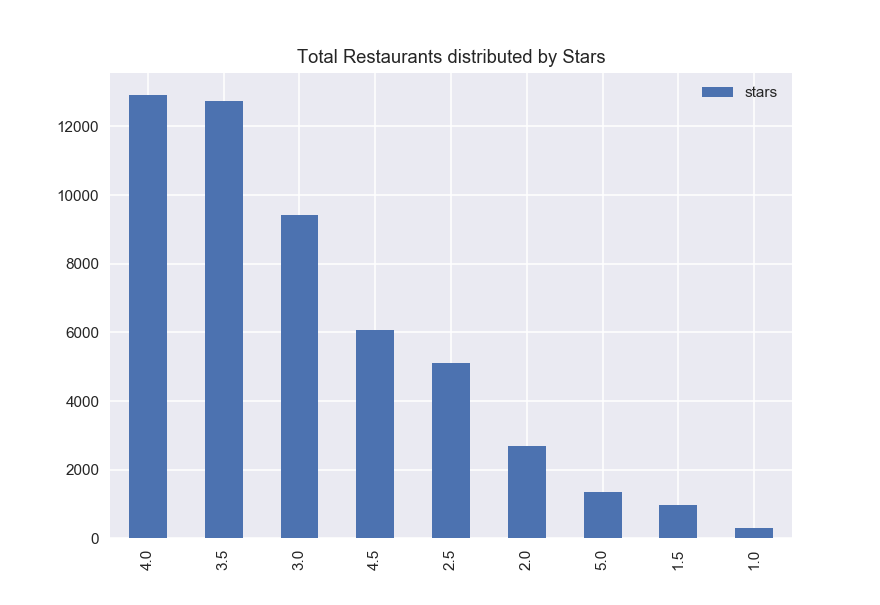

In [12]:
stars = restaurants.stars.value_counts()
starsCount = pd.DataFrame(stars)
starsCount.plot(kind="bar")
plt.title("Total Restaurants distributed by Stars")
plt.savefig('TotalRes_vs_Stars.png')

In [13]:
#Adding a column  (%) and adding the %
starsCount['stars(%)'] = starsCount['stars'] / len(restaurants) * 100
#starsCount

In [14]:
#Average of comments 
grouping_count_stars = restaurants.pivot_table(
    index=["stars"], 
    values=["review_count"], 
    aggfunc={"review_count":np.mean}, 
             #"review_count":np.mean},
    fill_value=0)

<IPython.core.display.Javascript object>


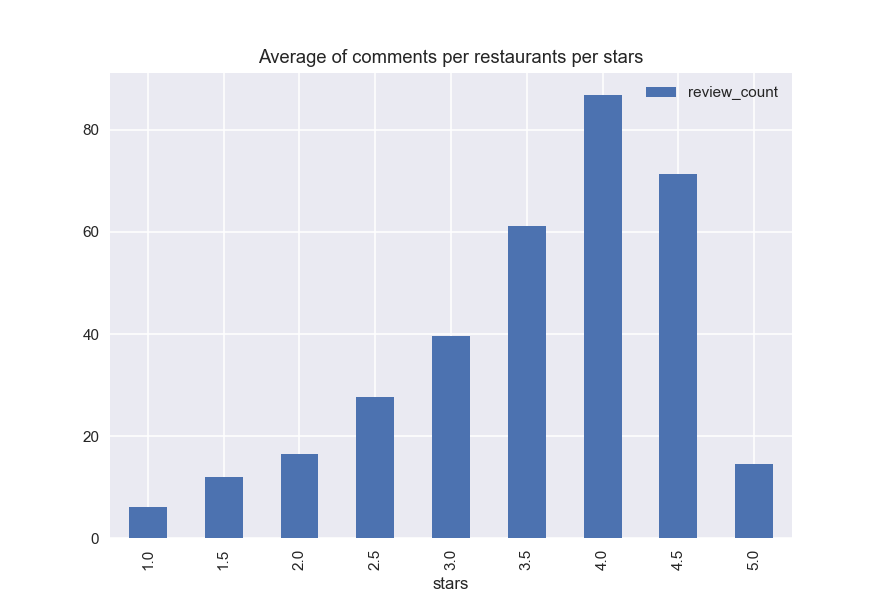

In [27]:
#Frequency table of review_count – for all
grouping_count_stars
grouping_count_stars.plot(kind= "bar")
plt.title("Average of comments per restaurants per stars")
plt.savefig('A_vs_Stars.png')

# 3. Open vs Closed Restaurants

# Review Count and Stars in US Cities 

In [16]:
pivot2 = restaurants.pivot_table(index=["state", "is_open"],values=["review_count"],
               columns=["stars"],aggfunc=[np.sum],fill_value=0)
#pivot2

In [28]:
#Creating a new table that allows to graph the heatmap. 
#Creating a dataframe with a dictionary of the states

states = pd.DataFrame({"state":["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]})

#Reset index and merging by state
states_review_df = pivot2.reset_index().merge(states, on="state")

C:\dev\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [29]:
reviewshm = states_review_df.reset_index()
reviewshm["state"] + "_" + reviewshm["is_open"].astype(str)

0     AZ_0
1     AZ_1
2     CA_1
3     IL_0
4     IL_1
5     NC_0
6     NC_1
7     NV_0
8     NV_1
9     NY_0
10    NY_1
11    OH_0
12    OH_1
13    PA_0
14    PA_1
15    SC_0
16    SC_1
17    WA_1
18    WI_0
19    WI_1
dtype: object

In [30]:
reviewshm = states_review_df.reset_index().drop('index', 1)
reviewshm["state_is_open"] = reviewshm["state"] + "_" + reviewshm["is_open"].astype(str)
r = reviewshm.set_index("state_is_open").drop('state', 1).drop('is_open', 1)
r.columns = r.columns.droplevel().droplevel()

C:\dev\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  """Entry point for launching an IPython kernel.
C:\dev\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


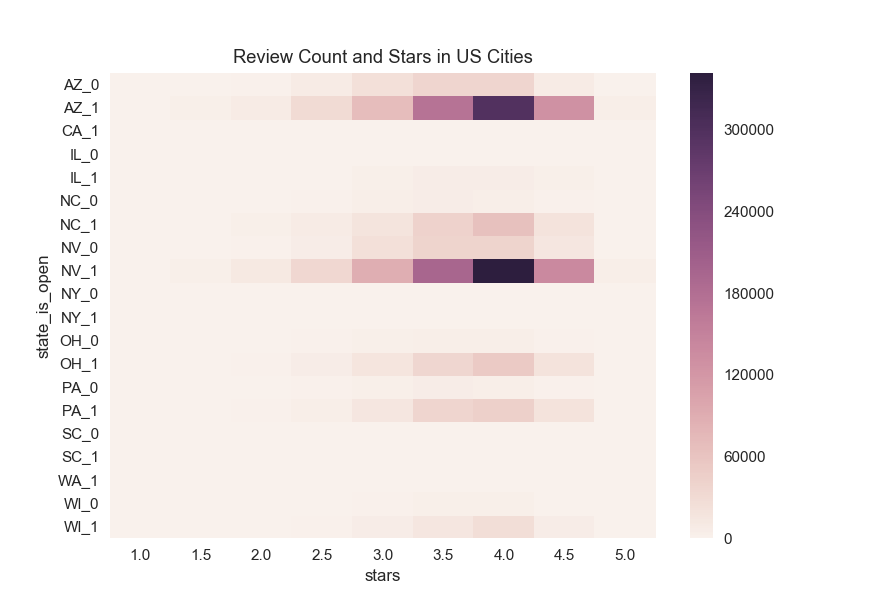

In [31]:
sns.heatmap(r)
plt.yticks(rotation=0) 
plt.title("Review Count and Stars in US Cities")
plt.savefig('Open_vs_Close_Heat.png')

Regardless of whether the business is open or closed, Arizona has the highest number of reviews followed by Nevada.

C:\dev\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


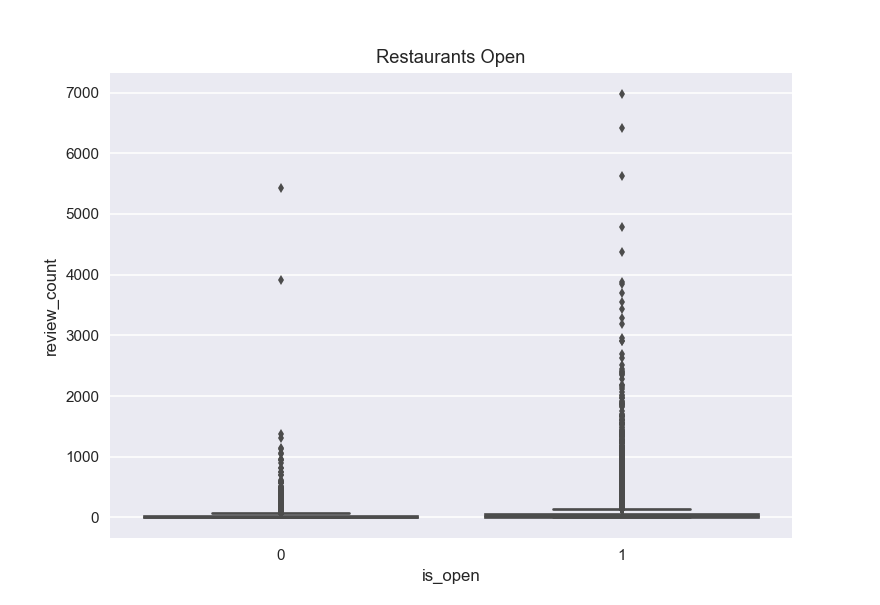

In [32]:
sns.boxplot(restaurants.loc[:, 'review_count'], groupby=restaurants.is_open)
plt.title('Restaurants Open')
plt.savefig('Open_vs_Close.png')

# What are the cities with the greatest distribution of 3, 4, and 5 stars open restaurants?

In [33]:
#How many restaurants have 5 stars and are open? 
oneReview = restaurants.query('stars == [5.0] & is_open == 1')

In [34]:
#How many restaruants are open by each state with five stars?
restaurants_fivestars_open = oneReview.pivot_table(
    index=["state"], 
    values=["business_id"], 
    #columns=["state"],
    aggfunc={"business_id":len},
    fill_value=0)
#restaurants_fivestars_open

In [35]:
restaurants_fivestars_open_clean = restaurants_fivestars_open.drop(restaurants_fivestars_open.index[0])
#restaurants_fivestars_open_clean

In [36]:
#How many restaurants are open and have 4 stars?
oneReviewfour = restaurants.query('stars == [4.0] & is_open == 1')
#len(oneReviewfour)

In [37]:
restaurants_fourstars_open = oneReviewfour.pivot_table(
    index=["state"], 
    values=["business_id"], 
    #columns=["state"],
    aggfunc={"business_id":len},
    fill_value=0)
#restaurants_fourstars_open

In [38]:
#How many restaurants are open and have 3 stars?
oneReviewthree = restaurants.query('stars == [3.0] & is_open == 1')
#len(oneReviewthree)

In [39]:
restaurants_threestars_open = oneReviewthree.pivot_table(
    index=["state"], 
    values=["business_id"], 
    #columns=["state"],
    aggfunc={"business_id":len},
    fill_value=0)
#restaurants_threestars_open

In [40]:
restaurants_threestars_open_clean = restaurants_threestars_open.drop(restaurants_threestars_open.index[0])
#restaurants_threestars_open_clean

In [41]:
#Creating a dataframe with a dictionary of the states
statestwo = pd.DataFrame({"state":["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]})

#Reset index and merging by state
states_stars_df = restaurants_threestars_open.reset_index().merge(states, on="state")
states_stars_df.rename(columns={'business_id': 'three_stars'})
states_stars_dftwo = restaurants_fourstars_open.reset_index().merge(states_stars_df, on="state")
#states_stars_dftwo
states_stars_dfthree = restaurants_fivestars_open.reset_index().merge(states_stars_dftwo, on="state")
#states_stars_dfthree

In [42]:
#Renaming
states_stars_dfclean = states_stars_dfthree.rename(columns={'business_id': 'five_stars', 'business_id_x': 'four_stars', 'business_id_y': 'three_stars'  })

In [43]:
#states_stars_dfclean

<IPython.core.display.Javascript object>


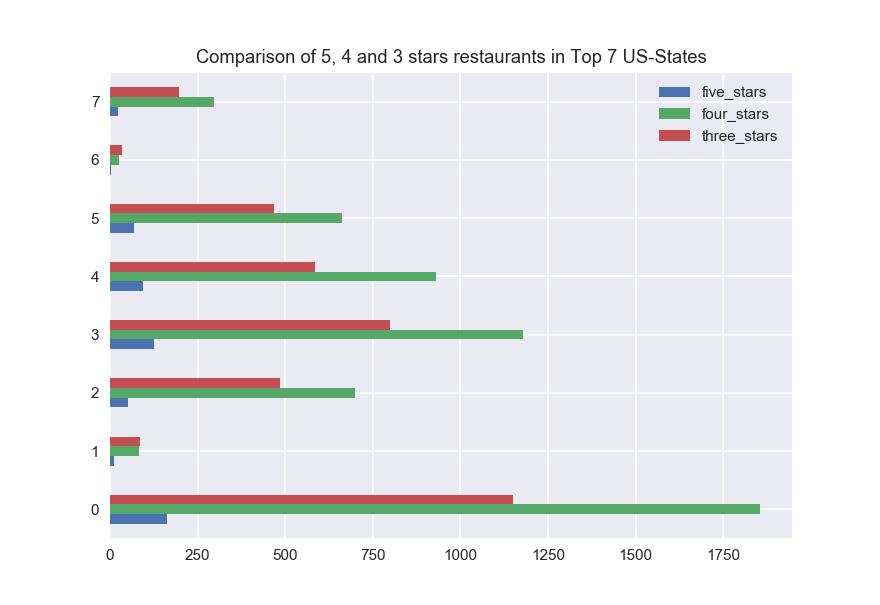

In [44]:
states_stars_dfclean.plot(kind="barh")
plt.title("Comparison of 5, 4 and 3 stars restaurants in Top 7 US-States")
plt.savefig('3_4_5Stars_vs_openrestaurants.png')

# 4. Comparing types of food
Mexican, Chinese, and Thai

In [45]:
#Creating a new df to handle data
restaurants_smaller = restaurants[["business_id", "categories", "city", "is_open", "review_count", "stars", "state" ]]
#restaurants_smaller.head()

In [46]:
restaurants_smaller['is_chinese'] = restaurants_smaller['categories'].apply(lambda x: 'Chinese' in x)
restaurants_smaller['is_thai'] = restaurants_smaller['categories'].apply(lambda x: 'Thai' in x)
restaurants_smaller['is_mexican'] = restaurants_smaller['categories'].apply(lambda x: 'Mexican' in x)
#restaurants_smaller.head()

C:\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [47]:
# "True / False to 0 / 1" 0 = False; 1 = True 
restaurants_smaller["is_chinese"] = restaurants_smaller["is_chinese"].replace('False',0,regex=True).astype('float')
restaurants_smaller["is_thai"] = restaurants_smaller["is_thai"].replace('False',0,regex=True).astype('float')
restaurants_smaller["is_mexican"] = restaurants_smaller["is_mexican"].replace('False',0,regex=True).astype('float')

C:\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [48]:
#restaurants_smaller 

<IPython.core.display.Javascript object>


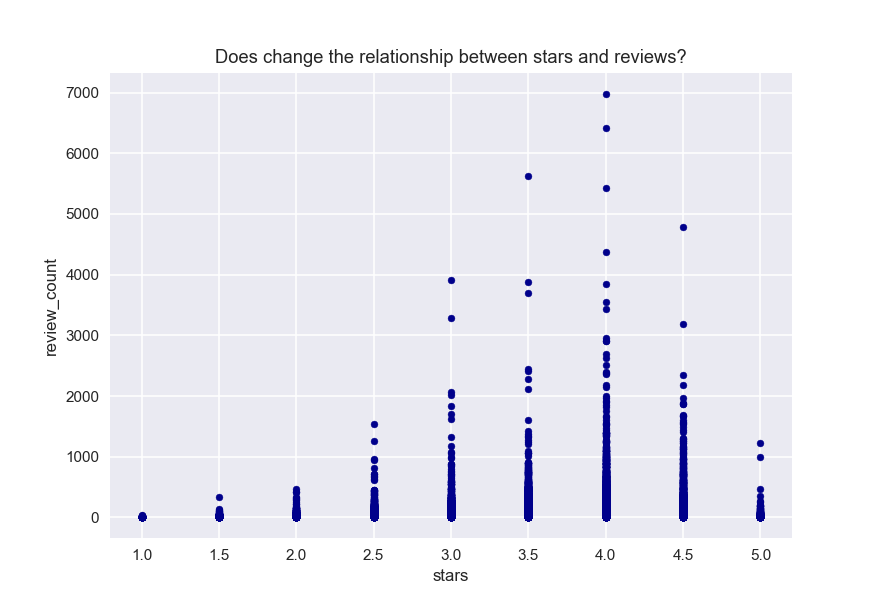

In [49]:
restaurants_smaller.plot(kind="scatter", x='stars', y='review_count', color='DarkBlue')
plt.title ("Does change the relationship between stars and reviews?")

In [50]:
food_comparison = restaurants_smaller.pivot_table(
                    index=["stars"],                
                    values=["is_chinese", "is_thai", "is_mexican"], #, "review_count"], 
                    aggfunc={#"review_count":len,
                            "is_chinese": sum, 
                             "is_thai": sum, 
                             "is_mexican": sum},
                    #margins = True,
                    #columns = ["city"],
                    fill_value=0)
#food_comparison

<IPython.core.display.Javascript object>


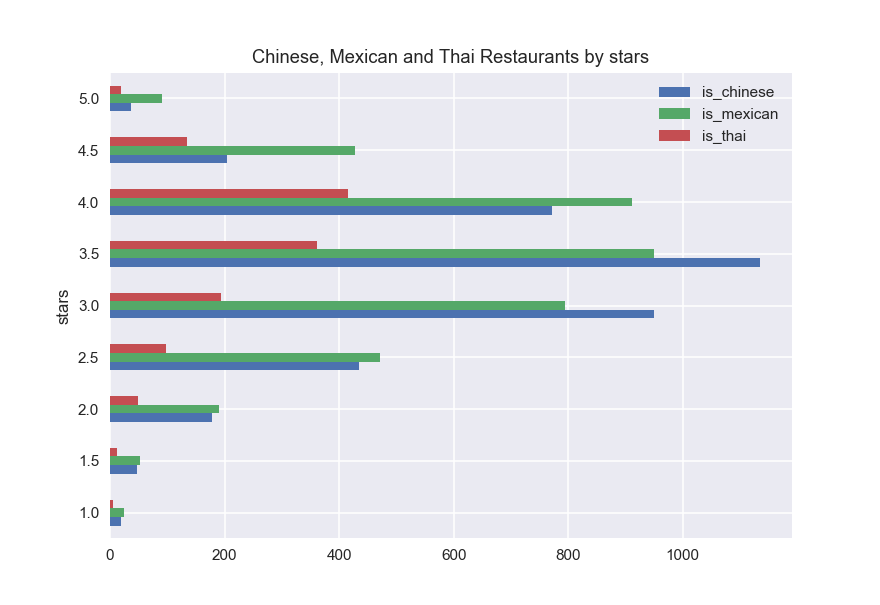

In [51]:
food_comparison.plot(kind="barh")#, x='review_count', y='stars', color='DarkBlue')
plt.savefig('Chinese_Mexican_Thai.png')
plt.title('Chinese, Mexican and Thai Restaurants by stars')

# Toronto

In [52]:
#To make the call for a X city given the city name // with this we can compare cities 
toronto = restaurants_smaller.query('city == ["Toronto"]')
#toronto

In [53]:
toronto_summary = toronto.pivot_table(
    index=["stars"], 
    values=["is_chinese", "is_thai", "is_mexican", "review_count"], 
    aggfunc={"review_count":np.mean,
            "is_chinese": sum, 
            "is_thai": sum, 
            "is_mexican": sum},
    fill_value=0)
toronto_summary.reset_index()

,stars,is_chinese,is_mexican,is_thai,review_count
0,1.0,2,0,0,6.217391
1,1.5,9,3,3,7.943396
2,2.0,32,9,25,13.286136
3,2.5,55,39,41,21.308186
4,3.0,140,53,54,32.788722
5,3.5,161,57,76,51.151564
6,4.0,87,54,55,56.556511
7,4.5,28,13,13,37.400626
8,5.0,2,2,0,10.014599


# Final Comments

# References 